In [1]:

import sys
sys.path.append("../")
from preprocessing.create_train_test_dicts import build_splits

ds = build_splits()
train_split = ds['train_numeric']
val_split = ds['val_numeric']
test_split = ds['test_numeric']


In [ ]:
from preprocessing.svm_pipeline_libsvm import SVCParamSearch
from sklearn.metrics import accuracy_score, f1_score

metrics = {
    "accuracy": accuracy_score,
    "f1_weighted": lambda y_true, y_pred: f1_score(y_true, y_pred, average="weighted"),
}

search = SVCParamSearch(
    train_dict=train_split,
    val_dict=val_split,
    pca_dims=[10,20,50,100],
    C_values=[1,5,10],
    gamma_values=["scale", 0.001, 0.01],
)

results = search.run()


Evaluating: PCA=10, kernel=rbf, C=1, gamma=scale
Fitting SVC pipeline:  C=1, gamma=scale, n_components=10
  Train size: 21529
  Feature dim after PCA: 10
  Training SVC...
  SVC training complete.
  [Going SVC] PCA=10, kernel=rbf, C=1, gamma=scale
  Val size: 7180
  Predictions done.
  Results: accuracy=0.3032033426183844, f1_weighted=0.25275763446394506

Evaluating: PCA=10, kernel=rbf, C=1, gamma=0.001
Fitting SVC pipeline:  C=1, gamma=0.001, n_components=10
  Train size: 21529
  Feature dim after PCA: 10
  Training SVC...
  SVC training complete.
  [Going SVC] PCA=10, kernel=rbf, C=1, gamma=0.001
  Val size: 7180
  Predictions done.
  Results: accuracy=0.3076601671309192, f1_weighted=0.267399479167235

Evaluating: PCA=10, kernel=rbf, C=1, gamma=0.01
Fitting SVC pipeline:  C=1, gamma=0.01, n_components=10
  Train size: 21529
  Feature dim after PCA: 10
  Training SVC...
  SVC training complete.
  [Going SVC] PCA=10, kernel=rbf, C=1, gamma=0.01
  Val size: 7180
  Predictions done.
  Re

In [3]:

import pandas as pd
df = pd.DataFrame(results)
df


,pca_dim,kernel,C,gamma,accuracy,f1_weighted
0,10,rbf,1,scale,0.303203,0.252758
1,10,rbf,1,0.001,0.307660,0.267399
2,10,rbf,1,0.01,0.368245,0.343657
3,10,rbf,5,scale,0.312117,0.277690
4,10,rbf,5,0.001,0.320195,0.293169
5,10,rbf,5,0.01,0.364763,0.358888
6,10,rbf,10,scale,0.317131,0.287822
7,10,rbf,10,0.001,0.323120,0.301333
8,10,rbf,10,0.01,0.364067,0.358681
9,20,rbf,1,scale,0.374930,0.344811


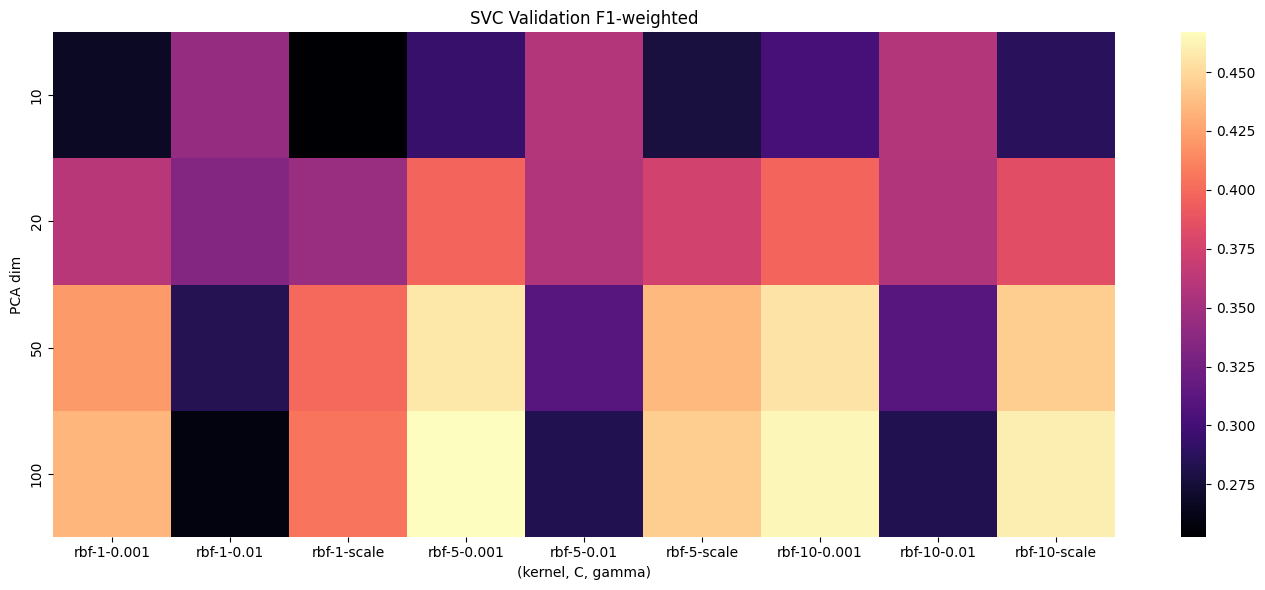

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap for F1 across kernels/params (flattened columns)
pivot_f1 = df.pivot_table(index="pca_dim", columns=["kernel", "C", "gamma"], values="f1_weighted")
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_f1, annot=False, cmap="magma")
plt.title("SVC Validation F1-weighted")
plt.xlabel("(kernel, C, gamma)")
plt.ylabel("PCA dim")
plt.tight_layout()
plt.show()


Best by f1_weighted: PCA=100, kernel=rbf, C=5, gamma=0.001, score=0.4669
Fitting SVC pipeline:  C=5, gamma=0.001, n_components=100
  Train size: 28709
  Feature dim after PCA: 100
  Training SVC...
  SVC training complete.
[Final SVC] PCA=100, kernel=rbf, C=5, gamma=0.001
Train+Val size: 28709, Test size: 7178


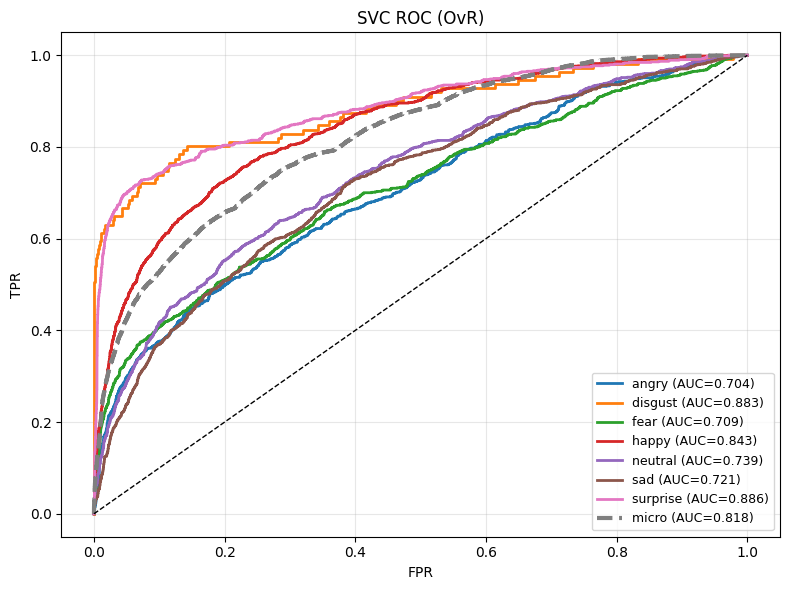

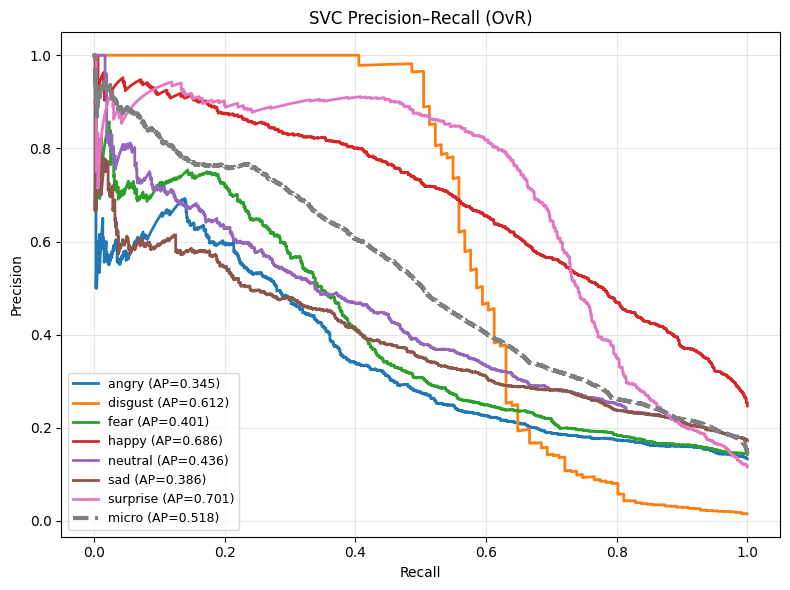

In [5]:

# Train best model on train+val, evaluate on test
svc_final, scaler_final, pca_final, X_test, y_test, y_score, class_names = search.train_best_model(
    results,
    test_dict=test_split,
    metric_name="f1_weighted",
)

# ROC & PR curves
SVCParamSearch.plot_roc(y_test, y_score, class_names)
SVCParamSearch.plot_pr(y_test, y_score, class_names)


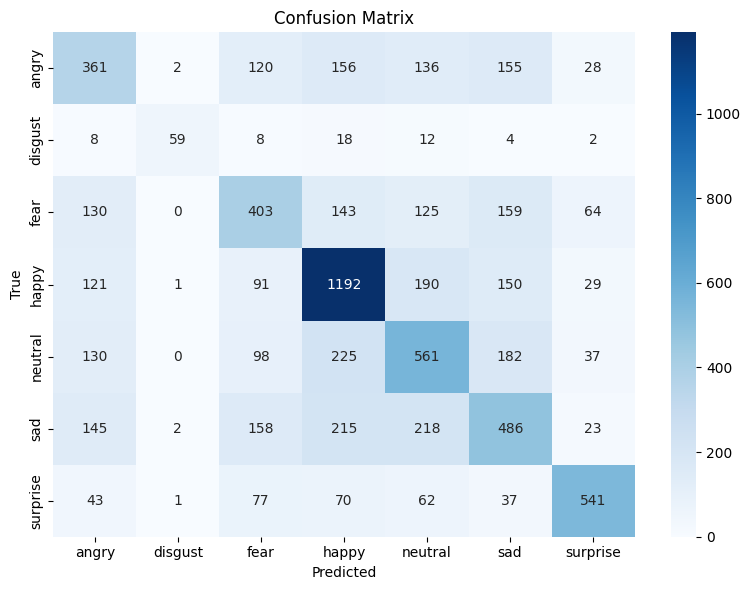

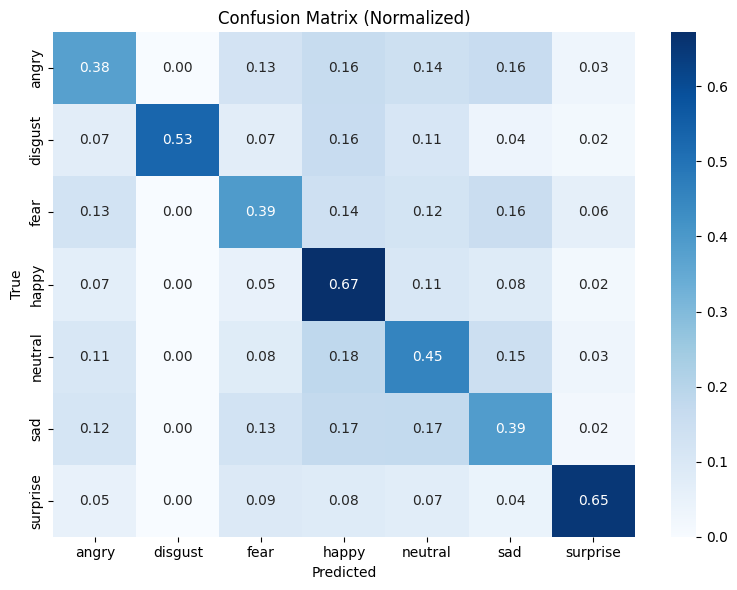

{'accuracy': np.float64(0.5019504040122597),
 'precision_per_class': array([0.38486141, 0.90769231, 0.42198953, 0.59039128, 0.43021472,
        0.41432225, 0.74723757]),
 'recall_per_class': array([0.37682672, 0.53153153, 0.39355469, 0.67192785, 0.45498783,
        0.38973536, 0.65102286]),
 'f1_per_class': array([0.38080169, 0.67045455, 0.4072764 , 0.62852623, 0.44225463,
        0.40165289, 0.69581994]),
 'macro_precision': np.float64(0.5566727243110571),
 'macro_recall': np.float64(0.49565526449839326),
 'macro_f1': np.float64(0.518112332526142)}

In [6]:

# Confusion matrices and metrics
from sklearn.metrics import confusion_matrix
from scripts.metrics_from_cm import metrics_from_confusion_matrix

y_pred = svc_final.predict(X_test)
SVCParamSearch.plot_cm(y_test, y_pred, class_names)
SVCParamSearch.plot_cm(y_test, y_pred, class_names, normalize=True, title="Confusion Matrix (Normalized)")

cm = confusion_matrix(y_test, y_pred, labels=class_names)
metrics_from_cm = metrics_from_confusion_matrix(cm)
metrics_from_cm
